# Excercise 2a: Exploratory Data Analysis

In [55]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

In [57]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

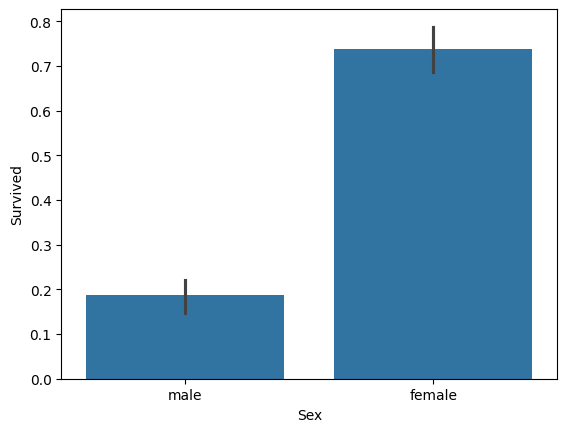

In [58]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes first-class passangers survive more, compared both to second-class and third-class.

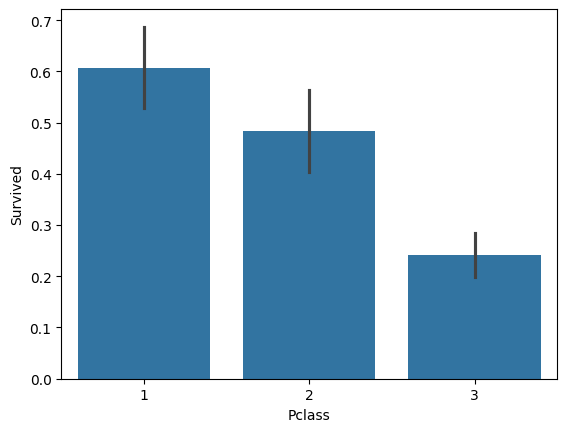

In [59]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

# Question 2: Is survival related to Embarked?

Answer: Yes survival is related to embarked.

TODO: There is some overlap on the error bars, is it OK to say that it is related?

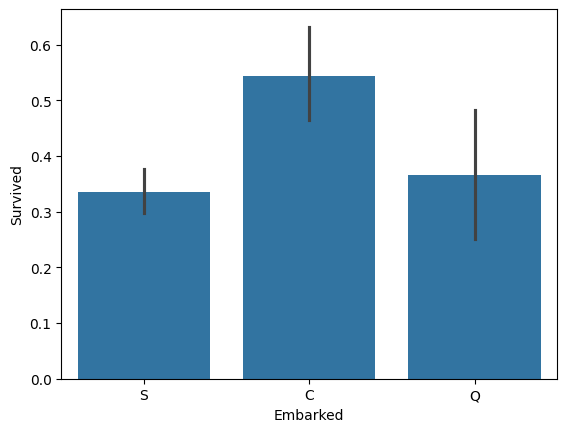

In [60]:
# Show the relevant statistics or visualization(s) to support your answer
# TODO: Why do I not need to convert this to numbers?
sns.barplot(x='Embarked', y='Survived', data=data)
plt.show()

# Question 3: How is age related to survival?

Answer: The survival rate decreases as age increases to a certain point, until it starts to start to increase again for most age ranges.

There are more survivors than deaths for the absolute youngest.
There are far more deaths than survivors in their 20's.
In their low 60's there are almost the same amount of deaths as survivors.

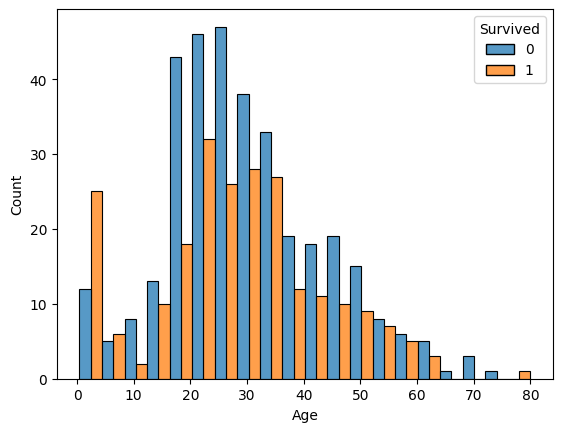

In [61]:
# Show the relevant statistics or visualization(s) to support your answer
# TODO: Is it not needed to normalize the column value? As in tdt4172. Maybe not, as that is only for the model, and this is just data exploration
# TODO: Maybe it would make sense to plot this as a line graph over survival rate instead. So that we could see the trend, instead of comparing the bars.
sns.histplot(x='Age', hue='Survived', data=data, multiple="dodge")
plt.show()

# Question 4: Does family size somehow affect the survival rate?

Answer: Correlation between if they have any family or not (plot 2). Visibly rising increase up to family size 3, but due to the confidence interval (error bars overlapping) we cannot be sure that this is statistical significant.

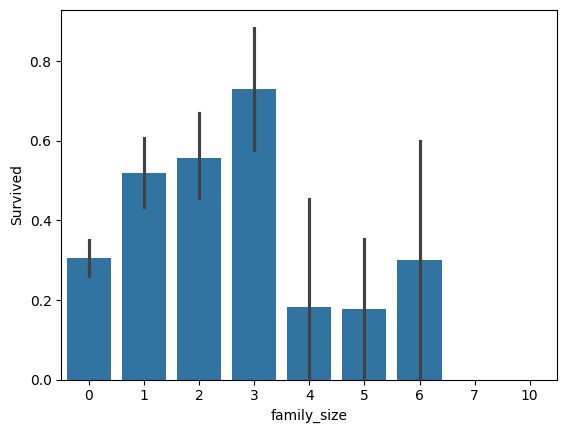

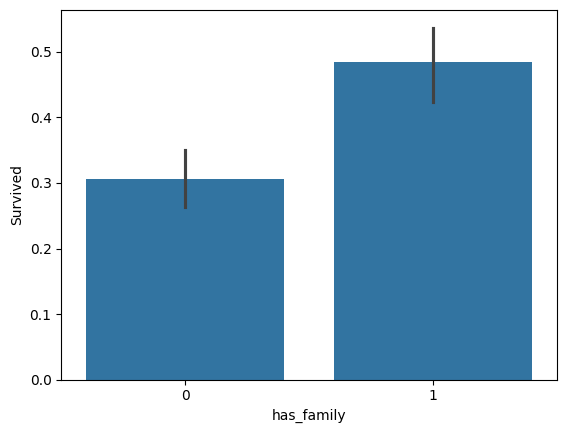

In [ ]:
# Show the relevant statistics or visualization(s) to support your answer
# The sum of sibling size + parents/children = family size
data["family_size"] = data["SibSp"] + data["Parch"]
sns.barplot(x='family_size', y='Survived', data=data)
plt.show()

# Create a separate chart to compare survival rate to see if they have any family
# Probably a more fancy way to do this. Something something .cut() .groupby()
data["has_family"] = (data["family_size"] > 0).astype(int)
sns.barplot(x='has_family', y='Survived', data=data)
plt.show()

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Removing the titles below a certain treshold we can identify some data. We can tell that regular men ("Mr") had a lower survival rate than women. 

We can tell that all revenants died.

We can tell that married women ("Mrs.") had a higher survival rate than unmarried ("Miss.")

We can tell that titled men, both Masters and doctors, had a higher survival rate than regular men. #TODO: Is is fair to assume that the people having these titles were all men?

Without filtering we can also see that all ladies with certain titles survived, but had a very low population (Countess, Lady, Mme, Ms).

title
Mr.          419
Miss.        143
Mrs.          96
Master.       33
Rev.           5
Dr.            5
Major.         2
Col.           2
Mlle.          2
Capt.          1
Mme            1
Ms.            1
Countess.      1
Lady.          1
Name: count, dtype: int64
Index(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Rev.', 'Dr.'], dtype='object', name='title')
712
701


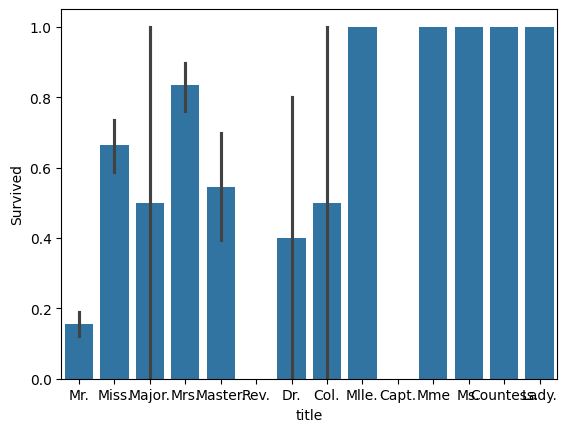

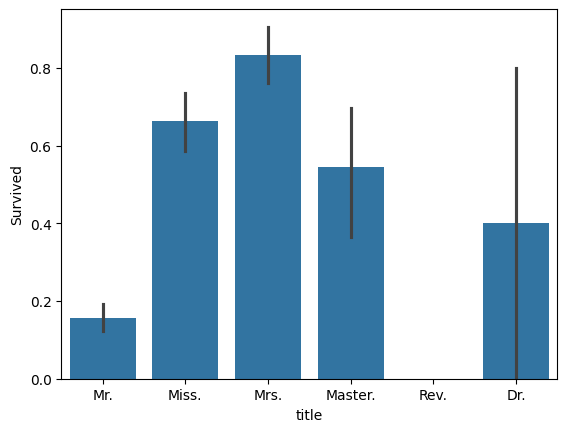

In [101]:
# Show the relevant statistics or visualization(s) to support your answer

#Built by adding known titles, and extracting rows not having title value, until all titles added
# test = data[["Name", "title"]]
# test_no_title = test[test["title"] == ""]
# print(test_no_title)

titles = ["Mr.", "Miss.", "Mrs.", "Dr.", "Master.", "Major.", "Rev.",
          "Capt.", "Lady.", "Col.", "Mlle.", "Mme", "Ms.", "Countess."]
mappings = dict(zip(titles, titles))

def extract_title(name: str):
    for title in titles:
        if title in name:
            return title
    return ""

data["title"] = data["Name"].apply(extract_title)
# TODO: Maybe we should filter out the titles that have very few people.
title_count = data["title"].value_counts()
relevant_titles = title_count[title_count >= 5].index
print(title_count)
print(relevant_titles)
filtered_df = data[data["title"].isin(relevant_titles)]
print(len(data))
print(len(filtered_df))
sns.barplot(x='title', y='Survived', data=data)
plt.show()

sns.barplot(x='title', y='Survived', data=filtered_df)
plt.show()